In [1]:
import tensorflow as tf
import skimage.io
import skimage.color
import numpy as np
from pprint import pprint

import sys
sys.path.insert(1,'../../functions') 

import dataset_generator as data
import read_cifar10 as cf10
import image_func as imf


In [2]:
#Read CIFAR images
cifar10_dataset_generators = {
    'train': data.cifar10_dataset_generator('train', 1000),
    'test': data.cifar10_dataset_generator('test', -1)
}

In [3]:
cifar10_dataset_generators = {
    'train': data.cifar10_dataset_generator('train', 1000),
    'test': data.cifar10_dataset_generator('test', -1)
}


In [4]:
#Load cifar-10 data
cf10_tr=cf10.load_training_data()
cf10_tr_img=cf10_tr[0]
cf10_tr_label = cf10_tr[1]

cf10_test=cf10.load_test_data()
cf10_test_img=cf10_test[0]
cf10_test_label = cf10_test[1]

In [5]:
lena_img = skimage.io.imread('../../test_img/lena512color.tiff')
lena_32=imf.img2block(lena_img)

        

#  CNN - RNN - FT

In [6]:
#Create the inputs in the desired format
x_tr = cf10_tr_img.astype(np.float32)#*255.
x_test = cf10_test_img.astype(np.float32)#*255.
x_test=x_test[:200,:,:,:]
img = skimage.io.imread('../../test_img/lena512color.tiff')
im_32=imf.img2block(img)


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
import numpy as np

def create_cnn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Assuming you have loaded your training and testing data
x_train = np.random.rand(1000, 32, 32, 3)  # Example training data
y_train = np.random.randint(0, 10, size=(1000,))  # Example training labels
x_test = np.random.rand(200, 32, 32, 3)  # Example test data
y_test = np.random.randint(0, 10, size=(200,))  # Example test labels

input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

# Create and compile the model
model = create_cnn_model(input_shape, num_classes)

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/10
32/32 [==============================] - 2s 26ms/step - loss: 2.3130 - accuracy: 0.1220 - val_loss: 2.3075 - val_accuracy: 0.1050
Epoch 2/10
32/32 [==============================] - 1s 22ms/step - loss: 2.3004 - accuracy: 0.1260 - val_loss: 2.3045 - val_accuracy: 0.1050
Epoch 3/10
32/32 [==============================] - 1s 26ms/step - loss: 2.2986 - accuracy: 0.1260 - val_loss: 2.3125 - val_accuracy: 0.1050
Epoch 4/10
32/32 [==============================] - 1s 25ms/step - loss: 2.2992 - accuracy: 0.1260 - val_loss: 2.3080 - val_accuracy: 0.1050
Epoch 5/10
32/32 [==============================] - 1s 26ms/step - loss: 2.2981 - accuracy: 0.1260 - val_loss: 2.3050 - val_accuracy: 0.1050
Epoch 6/10
32/32 [==============================] - 1s 21ms/step - loss: 2.2992 - accuracy: 0.1260 - val_loss: 2.3112 - val_accuracy: 0.1050
Epoch 7/10
32/32 [==============================] - 1s 20ms/step - loss: 2.2975 - accuracy: 0.1260 - val_loss: 2.3101 - val_accuracy: 0.1050
Epoch 8/10
32

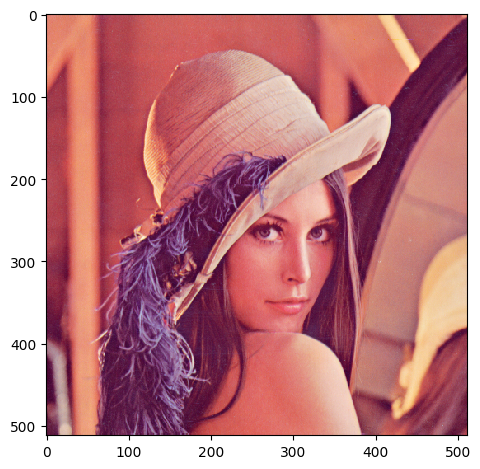

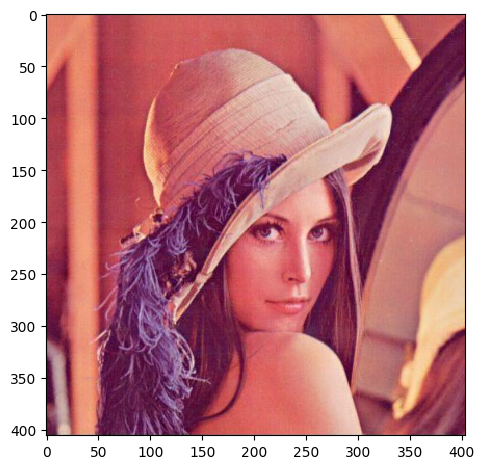

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1501 - accuracy: 0.9564 - val_loss: 0.0594 - val_accuracy: 0.9787
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0528 - accuracy: 0.9839 - val_loss: 0.0475 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0494 - val_accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0457 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0619 - val_accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0450 -

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

lena_recon = skimage.io.imread('../../test_img/lena512color.tiff')
skimage.io.imshow(lena_recon)
skimage.io.show()
lena = skimage.io.imread('../../test_img/cnn-rnn-ft.tiff')
skimage.io.imshow(lena)
skimage.io.show()
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the CNN model function
def create_cnn(input_shape, output_size, learning_rate):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(output_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model

# Define input_shape, output_size, and other hyperparameters
input_shape = (28, 28, 1)
output_size = 10
learning_rate = 0.001
epochs = 10
batch_size = 32

# Create the CNN model
cnn_model = create_cnn(input_shape, output_size, learning_rate)

# Train the model
history = cnn_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size
)

# Print training history
print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])
print("Training Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])


